# ML 101

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats

import sklearn.preprocessing

#plt.xkcd()

We start off with the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The data is multivariate, with 150 measurements of 4 features (length and width cm of both sepal and petal) on 3 distinct Iris species. Of the 150 measurements, there are 50 measurements each for _Iris setosa_, _Iris versicolor_, and _Iris virginica_.

In [55]:
data = pd.read_csv('../datasets/iris.csv')
variety={'Setosa':0, 'Versicolor':1, 'Virginica':2}
data.variety = [variety[item] for item in data.variety]
df_iris = df_iris[['sepal.length','sepal.width','petal.length','petal.width']]

iris = data[['variety']]
iris = iris.to_numpy()[:,0]

print('Iris dataset has {} rows and {} columns\n'.format(*df_iris.shape))

print('Here are the first 5 rows of the data:\n\n{}\n'.format(df_iris.head(5)))

print('Some simple statistics on the Iris dataset:\n\n{}\n'.format(df_iris.describe()))

Iris dataset has 150 rows and 4 columns

Here are the first 5 rows of the data:

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Some simple statistics on the Iris dataset:

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.5000

As we are exploring the dataset, it would be nice to view the data in order to get an idea of how the 3 species might be distributed with respect to one another in terms of their features. Perhaps we are interested in finding clusters, or maybe we would like to find a way to make class predictions?

However, since the data has 4 dimensions, we would be hard-pressed to come up with a good way to graph the data in 4D that we could easily understand.

_But what if we could reduce or compress the data so that we could work in 3 dimensions or less?_

[Singular value decomposition](http://mathworld.wolfram.com/SingularValueDecomposition.html) lets us do just that.

## Singular value decomposition

Singular value decomposition factorizes an $\mathbb{R}^{m \times n}$ matrix $X$ into

* matrix $U \in \mathbb{R}^{m \times m}$ are the left-singular vectors of $X$, where columns are the set of orthonormal eigenvectors of $X \, X^{\intercal}$
* diagonal matrix $\Sigma$ with entries $\sigma \in \mathbb{R}$ that are the non-negative singular values of $X$
* matrix $V \in \mathbb{R}^{n \times n}$ are the right-singular vectors $X$, where the columns are the set of orthonormal eigenvectors of $X^{\intercal} \, X$

such that 

\begin{align}
  X &= U \, \Sigma \, V^{\intercal}
\end{align}

We can use [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to factorize the Iris data matrix into three components $U$, $\Sigma$, and $V^{\intercal}$.

In [47]:
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris)

#### $U$: left-singular vectors of $X$

The rows of the $U$ correspond to the rows of original data matrix $X$, while the columns are the set of ordered, orthornormal eigenvectors of $X \, X^{\intercal}$.

In [48]:
print('matrix U has {} rows, {} columns\n'.format(*U_iris.shape))

print('{}'.format(pd.DataFrame(U_iris).head(5)))

matrix U has 150 rows, 150 columns

        0         1         2         3         4         5         6    \
0 -0.061617  0.129611  0.002139  0.001638 -0.073008 -0.081349 -0.069096   
1 -0.058071  0.111020  0.070672  0.051757 -0.126622 -0.141388 -0.128671   
2 -0.056763  0.117966  0.004343  0.009557 -0.011477  0.011574  0.020973   
3 -0.056653  0.105308  0.005925 -0.041644 -0.040371 -0.009030 -0.021519   
4 -0.061230  0.131090 -0.031881 -0.032215  0.980209 -0.021284 -0.019461   

        7         8         9    ...       140       141       142       143  \
0 -0.071139 -0.061952 -0.066123  ... -0.102115 -0.108387 -0.080935 -0.097794   
1 -0.101366 -0.077759 -0.068007  ...  0.028304  0.029499  0.037420  0.034586   
2 -0.041664 -0.046556 -0.085476  ...  0.059170 -0.041342  0.089185  0.100903   
3 -0.043809 -0.037601 -0.068263  ...  0.176731  0.267753  0.019712  0.068265   
4 -0.016720 -0.013285 -0.013002  ...  0.001743  0.004153 -0.000011 -0.000124   

        144       145       146 

#### $V$: right-singular vectors of $X$

[`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns $V^{\intercal}$ instead of $V$, so it is the _columns_ of $V^{\intercal}$ that correspond to the columns of original data matrix $X$. Hence, the _rows_ are the set of ordered, orthornormal eigenvectors of $X^{\intercal} \, X$.

In [49]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

matrix Vt has 4 rows, 4 columns

          0         1         2         3
0 -0.751108 -0.380086 -0.513009 -0.167908
1  0.284175  0.546745 -0.708665 -0.343671
2  0.502155 -0.675243 -0.059166 -0.537016
3  0.320814 -0.317256 -0.480745  0.751872


#### $\Sigma$: singular values of $X$

The elements $\sigma_{i}$ of diagonal matrix $\Sigma$ are the non-zero singular values of matrix $X$, which are really just the square roots of the non-zero eigenvalues of $X^{\intercal} \, X$ (and also for $X \, X^{\intercal}$). These singular values can be used to determine the amount of variance $X^{\prime}$ explains of the original data matrix $X$ when reducing the dimensions to find a lower rank approximation.

\begin{align}
   X^{\prime}_{k} &=  U_{k} \, \Sigma_{k} \, V^{\intercal}_{k} \\
                           &\approx X_{r} & \text{ where } rank(X^{\prime}) = k \lt rank(X) = r
\end{align}

The amount of variance that the reduced rank approximation $X^{\prime}_{k}$ explains of $X_{r}$ is

\begin{align}
  \text{cum. variance explained} &= \frac{\sum_{j=1}^{k} \sigma_{j}^{2}}{\sum_{i=1}^{r} \sigma_{i}^{2}}
\end{align}

**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns a $\Sigma$ that is not a diagonal _matrix_, but a _list_ of the entries on the diagonal.

In [50]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

Let's have a look at the cumulative variance explained visually as a function of the number of singular values used when reducing rank to find a lower-ranked matrix $X^{\prime}$ to approximate $X$. This will inform us as to how many dimensions we should use.

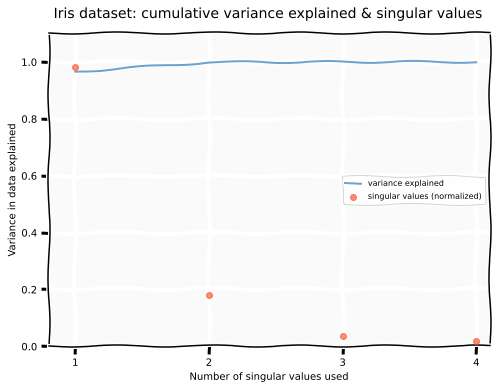

In [51]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Iris dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()
plt.show()

#### Dimension reduction

Judging from the curve representing cumulative variance explained in the figure above, we can see that

* with 1 singular value, about 96.5% of the variance of $X$ can be explained
* with 2 singular values, that number goes up to approximately 99.8%

Since graphing the Iris dataset in 1D wouldn't be all that interesting (just dots on a line segment), let's try using the first 2 singular values to represent the data on the $x$- and $y$-axes, respectively.

In [56]:

idx_setosa = np.where(iris==0)[0]
idx_versicolor = np.where(iris==1)[0]
idx_virginica = np.where(iris==2)[0]

setosa_x = U_iris[idx_setosa, 0]
setosa_y = U_iris[idx_setosa, 1]

versicolor_x = U_iris[idx_versicolor, 0]
versicolor_y = U_iris[idx_versicolor, 1]

virginica_x = U_iris[idx_virginica, 0]
virginica_y = U_iris[idx_virginica, 1]

We will use different marker shapes and colors to represent the three Iris species on our 2D graph.

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


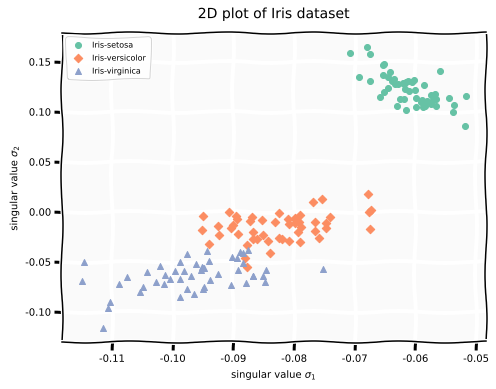

In [57]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_y,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_y,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_y,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Iris dataset',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

There!

Now that we are viewing the originally 4D data with 2 dimensions using the first 2 singular value columns of the $U$ left singular vectors matrix, we can see that there should be a very clear separation for the _Iris setosa_ class and the others. On the other hand, the demarcation between _Iris versicolor_ and _Iris virginica_ might not be as clear cut.

Nevertheless, since this 2D reduced-rank matrix representation $X^{\prime}$ explains nearly 99.8% of the variance in the original dataset, we can be pretty certain that clustering and classification should be possible.

# Helpful Resources

* [Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)
* [Correspondence analysis is a useful tool to uncover the relationships among categorical variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/)

----

# Appendix A

## PCA and SVD

Principal components analysis (PCA) and singular value decomposition are closely related, and you may often hear both these terms used in the same breath.  

Here is a quick mathematical treatment explaining how PCA and SVD are related.

Consider data matrix $X \in \mathbb{R}^{m \times n}$ where $m > n$, and all $x_{ij}$ are centered about the column means. With principal components analysis, we have

\begin{align}
  \text{covariance matrix } C &= \frac{1}{m} \, X^{\intercal} \, X & \text{from PCA} \\
  &= \frac{1}{m} \, V \, \Gamma \, V^{\intercal} & \text{by eigendecomposition of } X^{\intercal} \, X \\
  \\
  \text{ but } X &= U \, \Sigma V^{\intercal} & \text{from SVD} \\
  \\
  \Rightarrow C &= \frac{1}{m} \, V \, \Sigma \, U^{\intercal} \, U \, \Sigma V^{\intercal} \\
  &= \frac{1}{m} \, V \, \Sigma^{2} \, V^{\intercal} \\
\end{align}

So we see that:

1. the singular values in $\Sigma$ obtained via SVD are really just the square roots of the eigenvalues in $\Gamma$ of the covariance matrix in PCA.
1. if you mean-center your raw data matrix $X$ and then calculate SVD, you are doing the same thing as PCA.
1. the above example shows covariance of $X$ with respect to its columns ($X^{\intercal} \, X$); it also applies for covariance of $X$ with respect to rows ($X \, X^{\intercal}$).

#### Iris dataset: PCA & SVD

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data)

# don't forget to mean-center the data before SVD
X = iris.data - np.mean(iris.data, axis=0)
U, S, Vt = np.linalg.svd(X)

#### Compare the eigenvalues of $\Gamma$ derived from PCA with the singular values from $\Sigma$ derived with SVD: $\Gamma = \Sigma^{2}$?

In [ ]:
Cov_pca = pca.get_covariance()

print('eigenvalues from PCA:\n{}\n'.format(np.linalg.eigvals(Cov_pca * X.shape[0])))

print('squared singular values from SVD:\n{}'.format(np.square(S)))

eigenvalues from PCA:
[ 633.72611525   36.33653574   11.77858621    3.55245407]

squared singular values from SVD:
[ 629.50127448   36.09429217   11.70006231    3.52877104]


#### Can we obtain the covariance matrix $C$ derived with PCA, but using  $\frac{1}{m} \, V \, \Sigma^{2} \, V^{\intercal}$ from SVD?

In [ ]:
print('covariance matrix C derived from PCA:\n{}\n'.format(Cov_pca))

Cov_svd = (1. / X.shape[0]) * Vt.T.dot(np.diag(np.square(S))).dot(Vt) 
print('covariance matrix using S and Vt from SVD:\n{}\n'.format(Cov_svd))

allclose = np.allclose(Cov_pca, Cov_svd, atol=1e-1)
print('Are these matrices equivalent (element-wise closeness comparison)?\n{}'.format(allclose))

covariance matrix C derived from PCA:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

covariance matrix using S and Vt from SVD:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]

Are these matrices equivalent (element-wise closeness comparison)?
True
